In [2]:
import pandas as pd
import seaborn 
import numpy as np
pd.set_option('display.max_columns', None)
import sys
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/16703/Desktop/master_degree2/machine_learning/lab/LAB3/wineQualityWhites.csv")
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df[['quality']]=pd.cut(df.quality,[2,5,6,10],2, labels=['0','1','2'])
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [4]:
df["quality"] = df["quality"].cat.codes

In [5]:
X = df[[col for col in df.columns if col not in ['quality']]].values
y = df['quality'].values
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (4898, 11)
Shape of y: (4898,)


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print("Shape of X: {}".format(X.shape))

Shape of X: (4898, 11)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state=0)
print("Size of X_train: {}".format(X_train.shape))
print("Size of X_test: {}".format(X_test.shape))
print("Size of y_train: {}".format(y_train.shape))
print("Size of y_test: {}".format(y_test.shape))
print('\n')

# make sure it's stratified split
print(y_train.sum()/y_train.size)
print(y_test.sum()/y_test.size)

Size of X_train: (3918, 11)
Size of X_test: (980, 11)
Size of y_train: (3918,)
Size of y_test: (980,)


0.88157223073
0.881632653061


# Multi-Layer Perceptron


# 

In [25]:
from scipy.special import expit

class MultiLayerPerceptron:

    
    def __init__(self, n_hidden=1, size_hidden=10, C=0, epochs=300, 
                 alpha=0.001, phi='linear', cost='cross-entropy'):
        self.n_hidden = n_hidden
        self.n_layers = self.n_hidden + 1 
        # making two redundant parameters is annoying but makes bookkeeping way easier
        
        self.size_hidden = size_hidden
        self.C = C
        self.epochs = epochs
        self.alpha = alpha
        
        if phi in ['sigmoid', 'linear']:
            self.phi = phi
        else:
            raise ValueError('Not useful value')
        
        if cost in ['cross-entropy', 'mse']:
            self.cost = cost     
        else:
            raise ValueError('Not a valid option for attribute \'cost.\'')

            
            
    def _activation(self, z):
        if self.phi == 'sigmoid':
            return expit(z)
        elif self.phi == 'linear':
            return z
        else:
            raise ValueError('This phi function has not yet been implemented.')

            
            
    @staticmethod
    def _encode_labels(y):
        return pd.get_dummies(y).values.T

    
    
    @staticmethod
    def _add_bias(X, how='column'):
        if how == 'column':
            return np.hstack([np.ones((X.shape[0], 1)), X])
        elif how == 'row':
            return np.vstack([np.ones((1, X.shape[1])), X])
        else:
            raise ValueError('Invalid value for parameter \'how\'')

            
            
    def _forward_grad(self, A):
        if self.phi == 'sigmoid':
            return A * (1 - A)
        elif self.phi == 'linear':
            return np.ones(A.shape)
        else:
            raise ValueError('choose a method from sigmoid or linear')

            
            
    def _cost_grad(self, A, Y):
        if self.cost == 'mse':
            return -2 * (Y - A) * (1 - A)
        elif self.cost == 'cross-entropy':
            return (A - Y)
        else:
            raise NotImplementedError('This cost gradient has not yet been implemented')

            
            
    def _get_gradient(self, results, outputs, Y):
        sensitivity = self.network_.copy()

        sensitivity[-1] = self._cost_grad(results[-1], Y)
        
        self.grads_[-1] = sensitivity[-1] @ results[-2].T
        self.grads_[-1] += self.network_[-1] * self.C
        
        for i in range(-2, -self.n_layers, -1):
            if i == -2:
                sensitivity[i] = (self._forward_grad(results[i]) * 
                                  (self.network_[i+1].T @ sensitivity[i+1]))
            else:
                sensitivity[i] = (self._forward_grad(results[i]) * 
                                  (self.network_[i+1].T @ sensitivity[i+1][1:,:]))
                
            self.grads_[i] = sensitivity[i][1:,:] @ results[i-1].T
            self.grads_[i][:,1:] += self.network_[i][:,1:] * self.C
            
        for i in range(self.n_layers):
            if np.any(np.isnan(self.network_[i])):
                raise OverflowError('One or more of the training gradients blew up.')

            
            
    def _feedforward(self, X):
        result = []
        outputs = []
        
        A = self._add_bias(X, how='column').T
        result.append(A)
        for i in range(self.n_layers - 1):
            Z = self.network_[i] @ A
            A = self._add_bias(self._activation(Z), how='row')
            outputs.append(Z)
            result.append(A)
        Z = self.network_[self.n_layers - 1] @ A
        A = expit(Z)
        
        outputs.append(Z)
        result.append(A)

        return result, outputs

    
    
    def _random_weights(self, phi, dim1, dim2):
        if phi != 'glorot_final':
            bound = np.sqrt(6 / (dim1 + dim2 + 1))
            w_mat = np.random.uniform(-bound, bound, (dim1, dim2+1))
        else:
            bound = np.sqrt(0.5 / (dim1 + dim2 + 1))
            w_mat = np.random.uniform(-bound, bound, (dim1, dim2+1))
        return w_mat
    
    
    
    def _initialize_weights(self):
        network = []        
        if self.n_layers == 1:
            network.append(self._random_weights(self.phi, self.classes, 
                                                self.features))            
        else:
            network.append(self._random_weights(self.phi, self.size_hidden,
                                                self.features))            
            for i in range(1, self.n_layers-1):
                network.append(self._random_weights(self.phi, self.size_hidden,
                                                   self.size_hidden))                
            network.append(self._random_weights('glorot_final', self.classes,
                                                self.size_hidden))
            
        self.network_ = network
        self.grads_ = network.copy()
    

    
    def _cost(self, result_final, y):
        if self.cost == 'mse':
            return np.mean((y-result_final)**2)
        elif self.cost == 'cross-entropy':
            return -np.mean(y * np.log(result_final) + (1-y) * np.log(1 - result_final))
        else:
            raise ValueError('Check which cost function you are using.')
    
    
    
    def fit(self, X, y, test_sets=None, show_cost=False, print_progress=True, track_gradient=False):
        Xcopy = X.copy()
        Ycopy = self._encode_labels(y.copy())

        self.features = X.shape[1]
        self.classes = Ycopy.shape[0]       
        self._initialize_weights()

        if show_cost is True:
            cost_log = []
            
        if track_gradient is True:
            grad_log = []
            for i in range(self.n_layers):
                grad_log.append([])
        
        for i in range(self.epochs):
            result, outputs = self._feedforward(Xcopy)
            self._get_gradient(result, outputs, Ycopy)
            
            if track_gradient is True:
                for i in range(self.n_layers):
                    grad_log[i].append(abs(np.mean(self.grads_[i])))

            if show_cost is True:
                if test_sets is None:
                    cost_log.append(self._cost(result[-1], Ycopy))
                else:
                    cost_result, _ = self._feedforward(test_sets[0])
                    cost_log.append(self._cost(cost_result[-1], test_sets[1]))
                
            if print_progress is True:
                sys.stderr.write('\rEpoch: {}/{}'.format(i+1, self.epochs))
                sys.stderr.flush()
                
            for j in range(self.n_layers): 
                self.network_[j] -= self.alpha * self.grads_[j]
                
        if show_cost is True:
            if test_sets == None:
                which_score = 'Training'
            else:
                which_score = 'Validation'
            plt.plot(np.arange(len(cost_log)), np.array(cost_log))
            plt.title('{} {} Cost by Epoch on {} network'.format(which_score, self.cost.upper(), self.phi.upper()))
            plt.xlim(0,self.epochs)
            plt.ylim(0)
            plt.xlabel('Epochs')
            plt.ylabel('{} cost'.format(which_score))
            plt.legend(loc='best')
            plt.show()
            
        if track_gradient is True:
            return grad_log
        
            
    
    def predict(self, X):
        result, _ = self._feedforward(X)
        yhat = np.argmax(result[-1], axis=0)
        return yhat
    
    
    
    # these are just here to make the estimator compliant with sklearn's API
    def get_params(self, deep=True):
        return {
            'alpha': self.alpha, 'C': self.C, 'phi': self.phi,
            'cost': self.cost, 'n_hidden': self.n_hidden,
            'size_hidden': self.size_hidden, 'epochs': self.epochs
        }
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

In [61]:
from sklearn.metrics import accuracy_score, f1_score

Epoch: 200/200

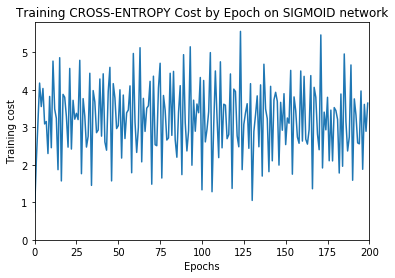

Epoch: 39/200

Test acc: 0.431632653061


Epoch: 200/200

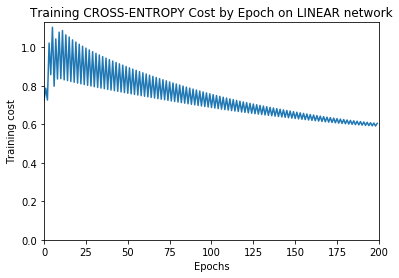

Epoch: 31/200

Test acc: 0.511224489796


Epoch: 200/200

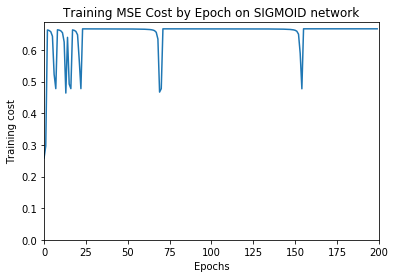

Epoch: 50/200

Test acc: 0.334693877551


Epoch: 200/200

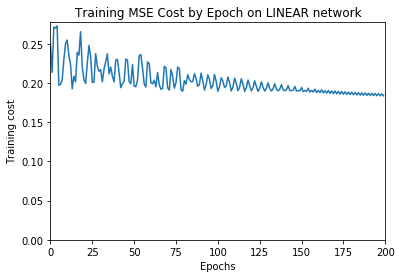

Test acc: 0.581632653061


In [76]:
for cost in ['cross-entropy', 'mse']:
    for act in ['sigmoid', 'linear']:
        nn = MultiLayerPerceptron(n_hidden=2, size_hidden=30, epochs=200, phi=act, alpha=0.001, cost=cost)

        nn.fit(X_train, y_train,print_progress=True, show_cost=True)
        yhat=nn.predict(X_test)
        print('Test acc:',accuracy_score(y_test,yhat))

## Hyperparameter Tuning

In [82]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

f1_scorer = make_scorer(f1_score, average='macro')

param_grid = {
    'phi': ['sigmoid', 'linear'],
    'cost': ['mse', 'cross-entropy'],
    'n_hidden': [1,2,3],
    'alpha': [0.001],
    'epochs': [50],
    'C': [0.01],
    'size_hidden': [20]
}

gs = GridSearchCV(estimator=MultiLayerPerceptron(),
                  param_grid=param_grid,
                  cv=3, #default is to use SKF, so no need to supply our own
                  scoring=f1_scorer,
                  verbose=2
                 )


In [83]:
gs.fit(X_train, y_train)

Epoch: 50/50[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
Epoch: 16/50

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20 


Epoch: 24/50

[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=20 


Epoch: 24/50

[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=20 


Epoch: 11/50

[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20 


Epoch: 4/500

[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=20 


Epoch: 33/50

[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=20 


Epoch: 17/50

[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20 


Epoch: 24/50

[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=20 


Epoch: 35/50

[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=20 


Epoch: 11/50

[CV]  C=0.01, alpha=0.001, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20 


Epoch: 25/50

[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=20 


Epoch: 40/50

[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=20 


Epoch: 21/50

[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20 


Epoch: 15/50

[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=20 


Epoch: 12/50

[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=20 


Epoch: 6/500

[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20 


Epoch: 9/500

[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=20, total=   0.1s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=20 


Epoch: 20/50

[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=20 
[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=20, total=   0.0s
[CV] C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=20 


Epoch: 50/50[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    5.2s finished
Epoch: 50/50

[CV]  C=0.01, alpha=0.001, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=20, total=   0.0s


GridSearchCV(cv=3, error_score='raise',
       estimator=<__main__.MultiLayerPerceptron object at 0x000001A41AD50240>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'phi': ['sigmoid', 'linear'], 'cost': ['mse', 'cross-entropy'], 'n_hidden': [1, 2, 3], 'alpha': [0.001], 'epochs': [50], 'C': [0.01], 'size_hidden': [20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=macro), verbose=2)

In [90]:
# let's try adjusting some of the fixed parameters we used to ones that tend to work better
param_grid['C'] = [0.001]
param_grid['size_hidden'] = [15]
param_grid['alpha'] = [1e-6]
param_grid['epochs'] = [50]

gs2 = GridSearchCV(estimator=MultiLayerPerceptron(),
                  param_grid=param_grid,
                  cv=3, 
                  scoring=f1_scorer,
                  verbose=5
                 )

gs2.fit(X_train, y_train)

Epoch: 50/50[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
Epoch: 28/50

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15, score=0.22287237397391868, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15 


Epoch: 50/50[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
Epoch: 50/50[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
Epoch: 29/50

[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15, score=0.16265657018008114, total=   0.1s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15, score=0.14396735769770663, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=15 


Epoch: 50/50[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
Epoch: 37/50

[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=15, score=0.2683412957643209, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=15, score=0.2897083694622287, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=15 


Epoch: 25/50

[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=1, phi=linear, size_hidden=15, score=0.44091894829894424, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15, score=0.28721948947812675, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15 


Epoch: 23/50

[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15, score=0.24822593568713883, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15, score=0.3308635254689262, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=15 


Epoch: 26/50

[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=15, score=0.31024012147910823, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=15, score=0.26870597704152815, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=15 


Epoch: 25/50

[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=2, phi=linear, size_hidden=15, score=0.3234918658245805, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15, score=0.203185481312266, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15 


Epoch: 31/50

[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15, score=0.12181894034209428, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15, score=0.3099664364206121, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=15 


Epoch: 43/50

[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=15, score=0.303578279419258, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=15, score=0.338332053961329, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=15 


Epoch: 22/50

[CV]  C=0.001, alpha=1e-06, cost=mse, epochs=50, n_hidden=3, phi=linear, size_hidden=15, score=0.4352634749945467, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15, score=0.20280589593322676, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15 


Epoch: 13/50

[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15, score=0.21197407252204462, total=   0.1s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=sigmoid, size_hidden=15, score=0.28624719922236913, total=   0.1s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=15 


Epoch: 50/50

[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=15, score=0.3187387176400959, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=15, score=0.3270884152185618, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=15 


Epoch: 26/50

[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=1, phi=linear, size_hidden=15, score=0.3902563017289233, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15, score=0.20280589593322676, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15 


Epoch: 34/50

[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15, score=0.12558931522956948, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=sigmoid, size_hidden=15, score=0.20832722416927194, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=15 


Epoch: 36/50

[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=15, score=0.3379758255175385, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=15, score=0.3142384011725114, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=15 


Epoch: 20/50

[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=2, phi=linear, size_hidden=15, score=0.3729630400134285, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15, score=0.17140690178232842, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15 


Epoch: 31/50

[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15, score=0.19799878749520386, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=sigmoid, size_hidden=15, score=0.1707685679633613, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=15 


Epoch: 43/50

[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=15, score=0.2649003170742301, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=15 
[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=15, score=0.33685005326377887, total=   0.0s
[CV] C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=15 


Epoch: 50/50[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.5s finished
Epoch: 50/50

[CV]  C=0.001, alpha=1e-06, cost=cross-entropy, epochs=50, n_hidden=3, phi=linear, size_hidden=15, score=0.29187378938173886, total=   0.0s


GridSearchCV(cv=3, error_score='raise',
       estimator=<__main__.MultiLayerPerceptron object at 0x000001A41AC71400>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'phi': ['sigmoid', 'linear'], 'cost': ['mse', 'cross-entropy'], 'n_hidden': [1, 2, 3], 'alpha': [1e-06], 'epochs': [50], 'C': [0.001], 'size_hidden': [15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score, average=macro), verbose=5)

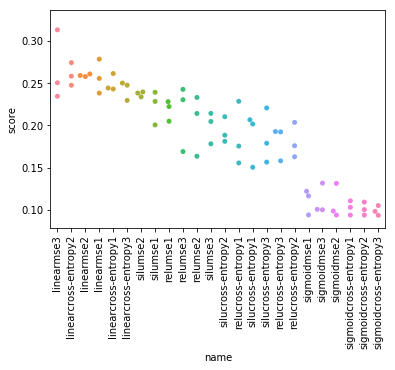

In [95]:
import seaborn as sns
grid_df = pd.DataFrame(gs2.cv_results_)
grid_df['name'] = grid_df.param_phi + grid_df.param_cost + grid_df.param_n_hidden.astype(str)

grid_df.sort_index(by='mean_test_score', inplace=True, ascending=False)
split_grid = grid_df.melt(value_vars=['split0_test_score','split1_test_score','split2_test_score'], 
                          var_name='split', value_name='score', id_vars='name')


sns.swarmplot(data=split_grid, x='name', y='score')
plt.xticks(rotation=90)
plt.show()

In [99]:
scores = pickle.load(open('cv_scores.p', 'rb'))

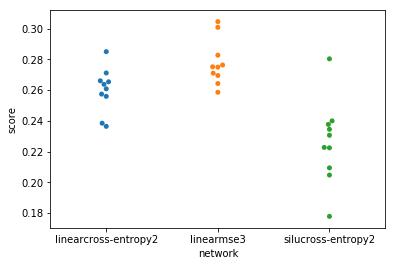

In [100]:
cv_df = pd.DataFrame(scores).melt(value_vars=['linearcross-entropy2',
                                              'linearmse3',
                                              'silucross-entropy2'],
                                 var_name='network',
                                 value_name='score')

sns.swarmplot(data=cv_df, x='network', y='score')
plt.show()